# More preprocessing (binning, encoding labels, etc.)

In [900]:
import pandas as pd
df = pd.read_csv("/Users/ckalo7/Documents/CSC 446/final_data/heart_final.csv")
df.head()

,age,sex,chest_pain,restingBP,cholesterol,fastingBS,restingECG,maxHR,exercise_angina,oldpeak,slope_st,diagnosis
0,42,M,NOA,160,147.0,0,Normal,146,N,0.0,Down,0
1,42,M,ASY,136,315.0,0,Normal,125,Y,1.8,Flat,1
2,76,M,NOA,104,239.5,0,LVH,120,N,3.5,Down,1
3,56,M,ASY,120,239.5,0,ST,148,N,0.0,Flat,1
4,58,M,ASY,100,213.0,0,ST,110,N,0.0,Up,0


In [901]:
import scipy.stats

def ent(data):
    p_data = data.value_counts()           # counts occurrence of each value
    entropy = scipy.stats.entropy(p_data)  # get entropy from counts
    return entropy

Find Entropy before binning continuous vals like age

In [902]:
print("age" + " =", ent(df['age']), \
      "\nsex" + " =", ent(df['sex']), \
      "\nchest_pain" + " =", ent(df['chest_pain']), \
      "\nrestingBP" + " =", ent(df['restingBP']), \
      "\ncholesterol" + " =", ent(df['cholesterol']), \
      "\nfastingBS" + " =", ent(df['fastingBS']), \
      "\nrestingECG" + " =", ent(df['restingECG']), \
      "\nmaxHR" + " =", ent(df['maxHR']), \
      "\nexercise_angina" + " =", ent(df['exercise_angina']), \
      "\noldpeak" + " =", ent(df['oldpeak']), \
      "\nslope_st" + " =", ent(df['slope_st']), \
      "\nDF" + " =", ent(df))

age = 3.6214341592503323 
sex = 0.519476817215667 
chest_pain = 1.1317592805331589 
restingBP = 3.08003337410988 
cholesterol = 4.5980434539312975 
fastingBS = 0.44667003779656334 
restingECG = 0.947106107539822 
maxHR = 4.307870078612027 
exercise_angina = 0.6685540728568362 
oldpeak = 2.4782007607855294 
slope_st = 0.9204370609305788 
DF = 6.801966640115419


Bin values like age to improve infoGain/Entropy

In [903]:
my_max = df['age'].loc[df['age'].idxmax()]      # max val in column
print(my_max)
my_min = df['age'].loc[df['age'].idxmin()]      # min val in column
print(my_min)

77
28


In [904]:
df.loc[(df['age'] < 10), 'age'] = 0
df.loc[(df['age'] >= 10) & (df['age'] < 20), 'age'] = 1
df.loc[(df['age'] >= 20) & (df['age'] < 30), 'age'] = 2
df.loc[(df['age'] >= 30) & (df['age'] < 40), 'age'] = 3
df.loc[(df['age'] >= 40) & (df['age'] < 50), 'age'] = 4
df.loc[(df['age'] >= 50) & (df['age'] < 60), 'age'] = 5
df.loc[(df['age'] >= 60) & (df['age'] < 70), 'age'] = 6
df.loc[(df['age'] >= 70) & (df['age'] < 80), 'age'] = 7
df.loc[(df['age'] >= 80) & (df['age'] < 90), 'age'] = 8

In [905]:
my_max = df['restingBP'].loc[df['restingBP'].idxmax()]      # max val in column
print(my_max)
my_min = df['restingBP'].loc[df['restingBP'].idxmin()]      # min val in column
print(my_min)

200
80


In [906]:
df.loc[(df['restingBP'] < 90), 'restingBP'] = 8
df.loc[(df['restingBP'] >= 90) & (df['restingBP'] < 100), 'restingBP'] = 9
df.loc[(df['restingBP'] >= 100) & (df['restingBP'] < 110), 'restingBP'] = 10
df.loc[(df['restingBP'] >= 110) & (df['restingBP'] < 120), 'restingBP'] = 11
df.loc[(df['restingBP'] >= 120) & (df['restingBP'] < 130), 'restingBP'] = 12
df.loc[(df['restingBP'] >= 130) & (df['restingBP'] < 140), 'restingBP'] = 13
df.loc[(df['restingBP'] >= 140) & (df['restingBP'] < 150), 'restingBP'] = 14
df.loc[(df['restingBP'] >= 150) & (df['restingBP'] < 160), 'restingBP'] = 15
df.loc[(df['restingBP'] >= 160) & (df['restingBP'] < 170), 'restingBP'] = 16
df.loc[(df['restingBP'] >= 170) & (df['restingBP'] < 180), 'restingBP'] = 17
df.loc[(df['restingBP'] >= 180) & (df['restingBP'] < 190), 'restingBP'] = 18
df.loc[(df['restingBP'] >= 190) & (df['restingBP'] < 200), 'restingBP'] = 19
df.loc[(df['restingBP'] >= 200) & (df['restingBP'] < 210), 'restingBP'] = 20

In [907]:
my_max = df['cholesterol'].loc[df['cholesterol'].idxmax()]      # max val in column
print(my_max)
my_min = df['cholesterol'].loc[df['cholesterol'].idxmin()]      # min val in column
print(my_min)

603.0
85.0


In [908]:
df.loc[(df['cholesterol'] < 100), 'cholesterol'] = 8
df.loc[(df['cholesterol'] >= 100) & (df['cholesterol'] < 150), 'cholesterol'] = 10
df.loc[(df['cholesterol'] >= 150) & (df['cholesterol'] < 200), 'cholesterol'] = 15
df.loc[(df['cholesterol'] >= 200) & (df['cholesterol'] < 250), 'cholesterol'] = 20
df.loc[(df['cholesterol'] >= 250) & (df['cholesterol'] < 300), 'cholesterol'] = 25
df.loc[(df['cholesterol'] >= 300) & (df['cholesterol'] < 350), 'cholesterol'] = 30
df.loc[(df['cholesterol'] >= 350) & (df['cholesterol'] < 400), 'cholesterol'] = 35
df.loc[(df['cholesterol'] >= 400) & (df['cholesterol'] < 450), 'cholesterol'] = 40
df.loc[(df['cholesterol'] >= 450) & (df['cholesterol'] < 500), 'cholesterol'] = 45
df.loc[(df['cholesterol'] >= 500) & (df['cholesterol'] < 550), 'cholesterol'] = 50
df.loc[(df['cholesterol'] >= 550) & (df['cholesterol'] < 600), 'cholesterol'] = 55
df.loc[(df['cholesterol'] >= 600) & (df['cholesterol'] < 650), 'cholesterol'] = 60

In [909]:
my_max = df['maxHR'].loc[df['maxHR'].idxmax()]      # max val in column
print(my_max)
my_min = df['maxHR'].loc[df['maxHR'].idxmin()]      # min val in column
print(my_min)

202
60


In [910]:
df.loc[(df['maxHR'] < 70), 'maxHR'] = 6
df.loc[(df['maxHR'] >= 70) & (df['maxHR'] < 80), 'maxHR'] = 7
df.loc[(df['maxHR'] >= 80) & (df['maxHR'] < 90), 'maxHR'] = 8
df.loc[(df['maxHR'] >= 90) & (df['maxHR'] < 100), 'maxHR'] = 9
df.loc[(df['maxHR'] >= 100) & (df['maxHR'] < 110), 'maxHR'] = 10
df.loc[(df['maxHR'] >= 110) & (df['maxHR'] < 120), 'maxHR'] = 11
df.loc[(df['maxHR'] >= 120) & (df['maxHR'] < 130), 'maxHR'] = 12
df.loc[(df['maxHR'] >= 130) & (df['maxHR'] < 140), 'maxHR'] = 13
df.loc[(df['maxHR'] >= 140) & (df['maxHR'] < 150), 'maxHR'] = 14
df.loc[(df['maxHR'] >= 150) & (df['maxHR'] < 160), 'maxHR'] = 15
df.loc[(df['maxHR'] >= 160) & (df['maxHR'] < 170), 'maxHR'] = 16
df.loc[(df['maxHR'] >= 170) & (df['maxHR'] < 180), 'maxHR'] = 17
df.loc[(df['maxHR'] >= 180) & (df['maxHR'] < 190), 'maxHR'] = 18
df.loc[(df['maxHR'] >= 190) & (df['maxHR'] < 200), 'maxHR'] = 19
df.loc[(df['maxHR'] >= 200) & (df['maxHR'] < 210), 'maxHR'] = 20

In [911]:
my_max = df['oldpeak'].loc[df['oldpeak'].idxmax()]      # max val in column
print(my_max)
my_min = df['oldpeak'].loc[df['oldpeak'].idxmin()]      # min val in column
print(my_min)

6.2
-2.6


In [912]:
df.loc[(df['oldpeak'] < -1.5), 'oldpeak'] = -2
df.loc[(df['oldpeak'] >= -1.5) & (df['oldpeak'] < .5), 'oldpeak'] = -1
df.loc[(df['oldpeak'] >= -0.5) & (df['oldpeak'] < 0.5), 'oldpeak'] = 0
df.loc[(df['oldpeak'] >= 0.5) & (df['oldpeak'] < 1.5), 'oldpeak'] = 1
df.loc[(df['oldpeak'] >= 1.5) & (df['oldpeak'] < 2.5), 'oldpeak'] = 2
df.loc[(df['oldpeak'] >= 2.5) & (df['oldpeak'] < 3.5), 'oldpeak'] = 3
df.loc[(df['oldpeak'] >= 3.5) & (df['oldpeak'] < 4.5), 'oldpeak'] = 4
df.loc[(df['oldpeak'] >= 4.5) & (df['oldpeak'] < 5.5), 'oldpeak'] = 5
df.loc[(df['oldpeak'] >= 5.5) & (df['oldpeak'] < 6.5), 'oldpeak'] = 6

In [913]:
df.head()

,age,sex,chest_pain,restingBP,cholesterol,fastingBS,restingECG,maxHR,exercise_angina,oldpeak,slope_st,diagnosis
0,4,M,NOA,16,10.0,0,Normal,14,N,-1.0,Down,0
1,4,M,ASY,13,30.0,0,Normal,12,Y,2.0,Flat,1
2,7,M,NOA,10,20.0,0,LVH,12,N,4.0,Down,1
3,5,M,ASY,12,20.0,0,ST,14,N,-1.0,Flat,1
4,5,M,ASY,10,20.0,0,ST,11,N,-1.0,Up,0


In [914]:
df.dtypes

age                  int64
sex                 object
chest_pain          object
restingBP            int64
cholesterol        float64
fastingBS            int64
restingECG          object
maxHR                int64
exercise_angina     object
oldpeak            float64
slope_st            object
diagnosis            int64
dtype: object

In [915]:
print("age" + " =", ent(df['age']), \
      "\nsex" + " =", ent(df['sex']), \
      "\nchest_pain" + " =", ent(df['chest_pain']), \
      "\nrestingBP" + " =", ent(df['restingBP']), \
      "\ncholesterol" + " =", ent(df['cholesterol']), \
      "\nfastingBS" + " =", ent(df['fastingBS']), \
      "\nrestingECG" + " =", ent(df['restingECG']), \
      "\nmaxHR" + " =", ent(df['maxHR']), \
      "\nexercise_angina" + " =", ent(df['exercise_angina']), \
      "\noldpeak" + " =", ent(df['oldpeak']), \
      "\nslope_st" + " =", ent(df['slope_st']), \
      "\nDF" + " =", ent(df))
     

age = 1.3903366988151937 
sex = 0.519476817215667 
chest_pain = 1.1317592805331589 
restingBP = 1.9959679603350395 
cholesterol = 1.3660020073924344 
fastingBS = 0.44667003779656334 
restingECG = 0.947106107539822 
maxHR = 2.32753608840209 
exercise_angina = 0.6685540728568362 
oldpeak = 1.3231007341612537 
slope_st = 0.9204370609305788 
DF = 6.7875383411211425


After viewing Entropy, drop those with higher Entropy (lower Info Gain)
- Usually, these values are continuous numerics (in this case, most)

In [916]:
#df.drop(df.iloc[:, [0,3,4,7,9]], inplace=True, axis='columns')
#df

In [917]:
inputs = df.drop('diagnosis', axis='columns')
target = df['diagnosis']

Encode the attribute labels into numbers

In [918]:
from sklearn.preprocessing import LabelEncoder

In [919]:
le_sex = LabelEncoder()
le_cp = LabelEncoder()
le_recg = LabelEncoder()
le_exan = LabelEncoder()
le_slo = LabelEncoder()

In [920]:
inputs['sex_n'] = le_sex.fit_transform(inputs['sex'])
inputs['cp_n'] = le_cp.fit_transform(inputs['chest_pain'])
inputs['recg_n'] = le_recg.fit_transform(inputs['restingECG'])
inputs['exan_n'] = le_exan.fit_transform(inputs['exercise_angina'])
inputs['slo_n'] = le_slo.fit_transform(inputs['slope_st'])
inputs.head()

,age,sex,chest_pain,restingBP,cholesterol,fastingBS,restingECG,maxHR,exercise_angina,oldpeak,slope_st,sex_n,cp_n,recg_n,exan_n,slo_n
0,4,M,NOA,16,10.0,0,Normal,14,N,-1.0,Down,1,2,1,0,0
1,4,M,ASY,13,30.0,0,Normal,12,Y,2.0,Flat,1,0,1,1,1
2,7,M,NOA,10,20.0,0,LVH,12,N,4.0,Down,1,2,0,0,0
3,5,M,ASY,12,20.0,0,ST,14,N,-1.0,Flat,1,0,2,0,1
4,5,M,ASY,10,20.0,0,ST,11,N,-1.0,Up,1,0,2,0,2


In [921]:
inputs_n = inputs.drop(inputs.iloc[:, [1,2,6,8,10]], axis='columns')
inputs_n.head()

,age,restingBP,cholesterol,fastingBS,maxHR,oldpeak,sex_n,cp_n,recg_n,exan_n,slo_n
0,4,16,10.0,0,14,-1.0,1,2,1,0,0
1,4,13,30.0,0,12,2.0,1,0,1,1,1
2,7,10,20.0,0,12,4.0,1,2,0,0,0
3,5,12,20.0,0,14,-1.0,1,0,2,0,1
4,5,10,20.0,0,11,-1.0,1,0,2,0,2


# Decision Tree

In [922]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [1021]:
model = tree.DecisionTreeClassifier(random_state=0, max_depth=5)

In [1022]:
model.fit(inputs_n, target)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [1023]:
model.score(inputs_n,target)

0.8235294117647058

In [1024]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.25)

In [1025]:
len(X_train)

675

In [1026]:
len(X_test)

226

In [1027]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [1028]:
model.score(X_test,y_test)

0.8185840707964602

In [1029]:
y_pred = model.predict(X_test)

**Confusion Matrix**

In [1030]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 70,  21],
       [ 20, 115]])

Text(58.222222222222214, 0.5, 'Truth')

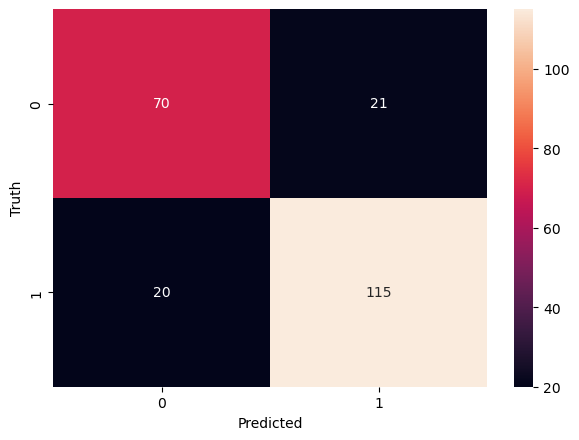

In [1031]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5), dpi=100)
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [1032]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7778    0.7692    0.7735        91
           1     0.8456    0.8519    0.8487       135

    accuracy                         0.8186       226
   macro avg     0.8117    0.8105    0.8111       226
weighted avg     0.8183    0.8186    0.8184       226



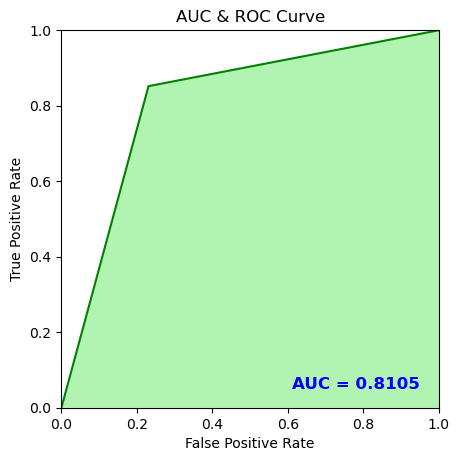

In [1033]:
from sklearn.metrics import roc_auc_score

auc = metrics.roc_auc_score(y_test, y_pred)
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fp_rate, tp_rate, 'g')
plt.fill_between(fp_rate, tp_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Random Forest

In [1171]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [1172]:
model.score(X_test, y_test)

0.8584070796460177

In [1173]:
y_pred = model.predict(X_test)

**Confusion Matrix**

In [1174]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 76,  15],
       [ 17, 118]])

Text(58.222222222222214, 0.5, 'Truth')

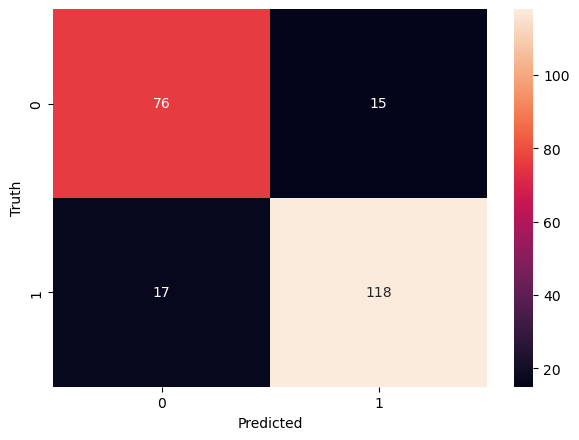

In [1175]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5), dpi=100)
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [1176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8172    0.8352    0.8261        91
           1     0.8872    0.8741    0.8806       135

    accuracy                         0.8584       226
   macro avg     0.8522    0.8546    0.8533       226
weighted avg     0.8590    0.8584    0.8586       226



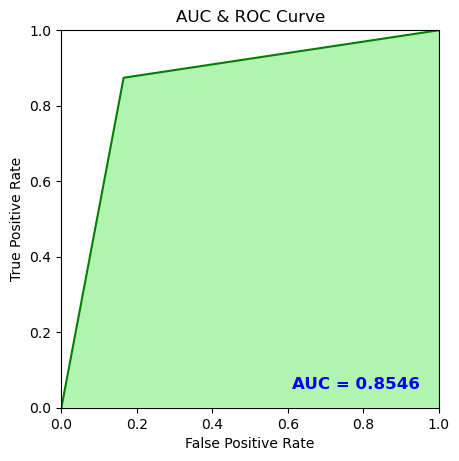

In [1177]:
from sklearn.metrics import roc_auc_score

auc = metrics.roc_auc_score(y_test, y_pred)
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fp_rate, tp_rate, 'g')
plt.fill_between(fp_rate, tp_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Support Vector Machines (SVM)

In [1379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [1380]:
len(X_train)

675

In [1381]:
len(X_test)

226

In [1382]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [1383]:
model.score(X_test, y_test)

0.6946902654867256

**Parameterization**\
*1. Regularization (C)*

In [1384]:
model_C = SVC(C=1000)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

In [1385]:
model_C = SVC(C=100)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9070796460176991

*2. Gamma*

In [644]:
model_g = SVC(gamma=1)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.5752212389380531

*3. Kernel*

In [645]:
#some error possibly, outputs 1.0 no matter what
model_linear_kernel = SVC(kernel='linear')
model_linear_kernel.fit(X_train, y_train)

model_linear_kernel.score(X_test, y_test)

1.0

*Confusion Matrix*

In [1386]:
from sklearn.metrics import confusion_matrix
y_pred = model_C.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 88,   9],
       [ 12, 117]])

Text(58.222222222222214, 0.5, 'Truth')

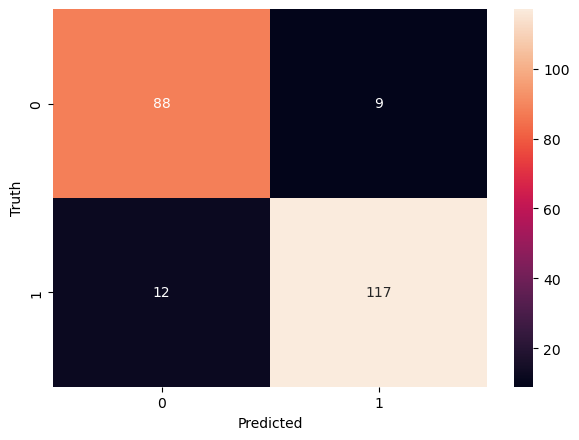

In [1387]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5), dpi=100)
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [1390]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8800    0.9072    0.8934        97
           1     0.9286    0.9070    0.9176       129

    accuracy                         0.9071       226
   macro avg     0.9043    0.9071    0.9055       226
weighted avg     0.9077    0.9071    0.9072       226



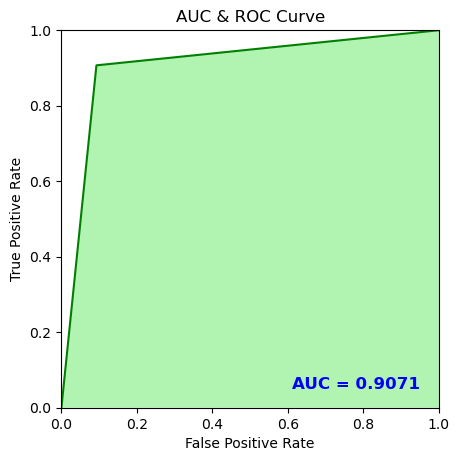

In [1391]:
from sklearn.metrics import roc_auc_score

auc = metrics.roc_auc_score(y_test, y_pred)
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fp_rate, tp_rate, 'g')
plt.fill_between(fp_rate, tp_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# K-Nearest Neighbor (KNN)

*Create KNN (K Neighrest Neighbour Classifier)*

In [1392]:
len(X_train)

675

In [1393]:
len(X_test)

226

In [1485]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [1486]:
knn.score(X_test, y_test)

0.7123893805309734

## *Plot Confusion Matrix*

In [1487]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 55,  42],
       [ 23, 106]])

Text(58.222222222222214, 0.5, 'Truth')

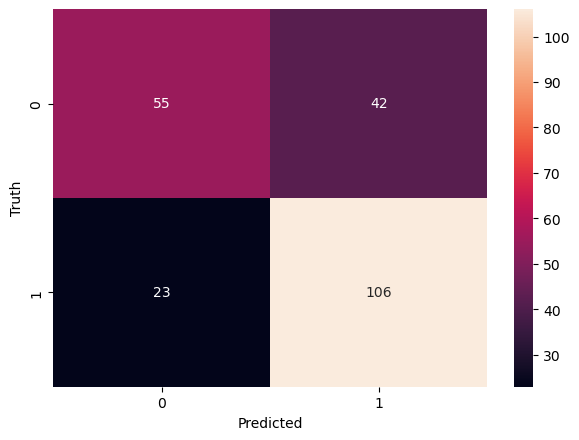

In [1488]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5), dpi=100)
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

*Print classification report for precesion, recall and f1-score for each classes*

In [1489]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7051    0.5670    0.6286        97
           1     0.7162    0.8217    0.7653       129

    accuracy                         0.7124       226
   macro avg     0.7107    0.6944    0.6970       226
weighted avg     0.7115    0.7124    0.7066       226



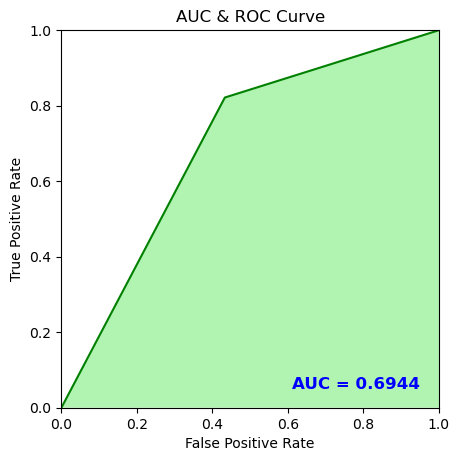

In [1491]:
from sklearn.metrics import roc_auc_score

auc = metrics.roc_auc_score(y_test, y_pred)
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fp_rate, tp_rate, 'g')
plt.fill_between(fp_rate, tp_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Naive-Bayes

In [1497]:
inputs_n.head()

,age,restingBP,cholesterol,fastingBS,maxHR,oldpeak,sex_n,cp_n,recg_n,exan_n,slo_n
0,4,16,10.0,0,14,-1.0,1,2,1,0,0
1,4,13,30.0,0,12,2.0,1,0,1,1,1
2,7,10,20.0,0,12,4.0,1,2,0,0,0
3,5,12,20.0,0,14,-1.0,1,0,2,0,1
4,5,10,20.0,0,11,-1.0,1,0,2,0,2


In [1745]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.25)

In [1746]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [1747]:
model.fit(X_train,y_train)

GaussianNB()

In [1748]:
model.score(X_test,y_test)

0.8053097345132744

*Calculate the score using cross validation*

In [1749]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.82222222, 0.77037037, 0.73333333, 0.73333333, 0.77037037])

**Confusion Matrix**

In [1750]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[89, 22],
       [22, 93]])

Text(58.222222222222214, 0.5, 'Truth')

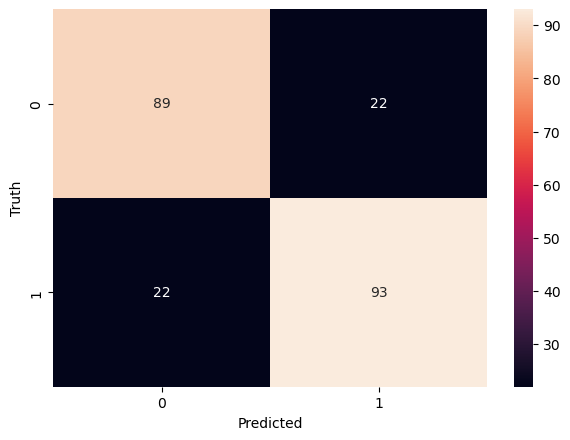

In [1751]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5), dpi=100)
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

*Print classification report for precesion, recall and f1-score for each classes*

In [1752]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8018    0.8018    0.8018       111
           1     0.8087    0.8087    0.8087       115

    accuracy                         0.8053       226
   macro avg     0.8052    0.8052    0.8052       226
weighted avg     0.8053    0.8053    0.8053       226



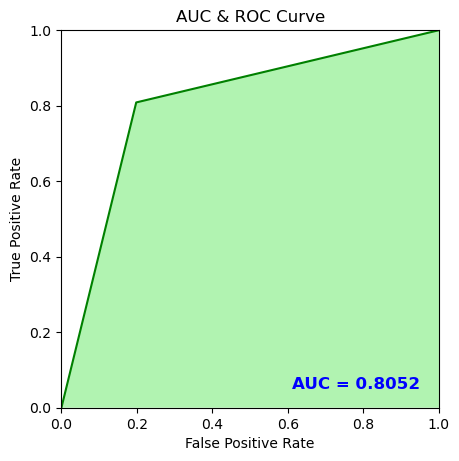

In [1753]:
from sklearn.metrics import roc_auc_score

auc = metrics.roc_auc_score(y_test, y_pred)
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fp_rate, tp_rate, 'g')
plt.fill_between(fp_rate, tp_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [1754]:
print("# of negative Heart Disease cases =", df['diagnosis'].value_counts()[0])
print("# of positive Heart Disease cases =", df['diagnosis'].value_counts()[1])
print("# of all Heart Disease cases =", df.shape[0])

# of negative Heart Disease cases = 407
# of positive Heart Disease cases = 494
# of all Heart Disease cases = 901


In [1755]:
df['diagnosis'].value_counts()[1]/df['diagnosis'].value_counts()[0]

1.2137592137592137